# **Descripción del Proyecto**

**Obejtivo**
Determinar qué factores influyen en el precio de un vehículo de acuerdo a los datos extraídos de 'Crankshaft List'. Este es un sitio web dónde cientos de anuncios gratuitos de vehículos son publicados al día.

**Descripción de los datos**
El conjunto de datos contiene los siguientes datos:

* `price`
* `model_year`
* `model`
* `condition`
* `cylinders`
* `fuel` — gasolina, diesel, etc.
* `odometer`— el millaje del vehículo cuando el anuncio fue publicado
* `transmission`
* `paint_color`
* `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
* `date_posted` — la fecha en la que el anuncio fue publicado
* `days_listed` — desde la publicación hasta que se elimina

# **Paso 1. Cargando los datos y librerías**

In [ ]:
import pandas as pd
import numpy as np #Nos metimos en problemas con unos valores inusuales
import matplotlib.pyplot as plt #Y vamos a necesitar hacer unos boxplots y graficos
from scipy import stats
from statistics import mode

In [ ]:
car_data = pd.read_csv('/datasets/vehicles_us.csv') #Loading the data para el proyecto

<div class="alert alert-block alert-info">
👀
</div>

# **Paso 2. Preprocesando Datos**

In [ ]:
car_data.shape #número de: filas, columnas en el dataframe

(51525, 13)

In [ ]:
car_data.head(10) #Un vistazo de los primeros datos del dataframe

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [ ]:
car_data.info() #Aquí se muestran todas las columnas y el tipo información que contiene cada una de ellas, así como el númeor de filas que contienen valores. Podemos darnos cuenta que hay 5 columnas que tienen valores ausentes:
# model_year, cylinders, odometer, paint_color, is_4wd. También hay algunos datos decimales que serán transformados a valores enteros, y los demás datos los iremos tratando conforme avancemos si es necesario.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [ ]:
car_data.describe() #Datos estadísticos del dataframe

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [ ]:
car_data.isnull().sum() #Ahora revisaremos aquí las columnas del dataframe y el número de filas en cada uno que tiene valores nulos.

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [ ]:
100 *car_data.isnull().sum() / len(car_data) #El porcentaje de valores ausentes en cada una de las columnas del dataframe nos muestra que is_4wd es la columna con más valores ausentes (50%), los valores de esa columna son 0 y 1.
#En is_4wd, la mayoría de los valores ausentes los tomaremos como 0, asumiendo que son vehículos que no tienen tracción a las 4 ruedas, así que rellenamremos esos valores con 0.

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

## Preprocesando `is_4wd`

In [ ]:
car_data['is_4wd'] = car_data['is_4wd'].fillna(0)
car_data.isnull().sum()
#Aquí podemos ver que ya no hay valores ausentes en la columna de is_4wd, ahora tienen 0 aquellos registros que no cumplen con la condicion True para tracción a 4 ruedas.


price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

## Preprocesando `paint_color`

In [ ]:
#El siguiente parámetro que vamos a tratar es paint_color, esos valores los trataremos asumiendo que no se proporcionó el color del vehículo mientras se llenaba la información del dataframe.
#Rellenaremos este valor string con 'surprise' para la columna de pintura, solo son el 18% aprox. de valores faltantes.
car_data['paint_color'] = car_data['paint_color'].fillna('surprise')
car_data.isnull().sum()

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

## Preprocesando `odometer`

In [ ]:
#Ahora nos encontramos con la columna de 'odometer'. Aquí podemos ver que hay ciertos valores que son demasiado altos.
car_data['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [ ]:
car_data[car_data['odometer'] == 99000].head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
279,5999,2012.0,nissan altima,excellent,4.0,gas,99000.0,automatic,sedan,black,0.0,2018-12-27,28
802,33995,NaN,chevrolet silverado 2500hd,excellent,8.0,diesel,99000.0,automatic,truck,white,1.0,2019-03-22,72
820,17500,2014.0,toyota tacoma,excellent,6.0,gas,99000.0,automatic,truck,grey,0.0,2018-12-06,80
1179,1500,2015.0,chevrolet equinox,excellent,4.0,gas,99000.0,automatic,SUV,silver,1.0,2019-03-26,48
1330,15250,2017.0,subaru forester,excellent,4.0,gas,99000.0,automatic,SUV,silver,1.0,2019-03-18,103
1783,26669,2011.0,gmc sierra 2500hd,good,8.0,diesel,99000.0,automatic,truck,custom,1.0,2019-02-10,21
2186,2800,2003.0,ford f-150,good,NaN,gas,99000.0,manual,pickup,white,0.0,2018-09-01,14
2482,13500,2016.0,kia sorento,good,4.0,gas,99000.0,automatic,SUV,custom,0.0,2019-02-15,36
2532,8300,2014.0,ford escape,excellent,4.0,gas,99000.0,automatic,SUV,silver,0.0,2018-07-17,31
2543,4950,2006.0,chevrolet trailblazer,excellent,NaN,gas,99000.0,automatic,SUV,purple,1.0,2018-12-07,34


Vamos a rellenar los valores faltantes en 'odometer' con el valor de la mediana para que no haya problemas  en la distribución de los datos a largo plazo, esto es debido a la gran diferencia que hay entre el valor máximo y la std. 

In [ ]:
car_data['odometer'].isna().sum()

7892

In [ ]:
car_data['odometer'] = car_data['odometer'].fillna(car_data.groupby('condition')['odometer'].transform(mode))
car_data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,surprise,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,200000.0,automatic,pickup,surprise,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71


In [ ]:
car_data['odometer'].isna().sum()

0

## Preprocesando `model_year`

In [ ]:
car_data['model_year'].isna().sum()

3619

In [ ]:
car_data['model_year'] = car_data['model_year'].fillna(car_data.groupby('model')['model_year'].transform(mode))
car_data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,surprise,1.0,2018-06-23,19
1,25500,2013.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,200000.0,automatic,pickup,surprise,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71


In [ ]:
car_data.isna().sum()

price              0
model_year         0
model              0
condition          0
cylinders       5260
fuel               0
odometer           0
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [ ]:
car_data['cylinders'] = car_data['cylinders'].fillna(car_data.groupby('model')['cylinders'].transform(mode))
car_data['cylinders'].isna().sum()

0

Hasta ahora hemos rellenado los valores ausentes que encontramos en nuestro dataframe, comenzamos con las variables categóricas de las columnas `is_4wd` y `paint_color`: Con 0 aquellas filas en la columna de tracción a 4 ruedas para especificar que no cuenta con ella, y utilizamos 'surprise' para los vehículos que no cuentan con información sobre color. En las columnas numéricas `odometer`, `model_year` `cylinders`, rellenamos sus filas de valores ausentes con la mediana para el millaje, y también para el año utilizamos la mediana

In [ ]:
car_data.info()
# Aquí podemos ver que las columnas model_year, cylinders, odometer, is_4wd, tienen valores decimales, así que los vamos a convertir en númeos enteros para hacer más fácil su manipulación conforme avanzamos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [ ]:
try:
  car_data['model_year'] = car_data['model_year'].astype(int)
except:
  print('nope 1')
try:
  car_data['cylinders'] = car_data['cylinders'].astype(int)
except:
  print('nope 2')
try:
  car_data['odometer'] = car_data['odometer'].astype(int)
except:
  print('nope 3')
try:
  car_data['is_4wd'] = car_data['is_4wd'].astype(int)
except:
  print('nope 3')

In [ ]:
car_data.info() #Ahora todos son enteros

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         51525 non-null  int64 
 1   model_year    51525 non-null  int64 
 2   model         51525 non-null  object
 3   condition     51525 non-null  object
 4   cylinders     51525 non-null  int64 
 5   fuel          51525 non-null  object
 6   odometer      51525 non-null  int64 
 7   transmission  51525 non-null  object
 8   type          51525 non-null  object
 9   paint_color   51525 non-null  object
 10  is_4wd        51525 non-null  int64 
 11  date_posted   51525 non-null  object
 12  days_listed   51525 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 5.1+ MB


In [ ]:
car_data['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [ ]:
#Vamos a reemplazar los valores de la columna condition por los valores de una escala en la que new = 5, like new = 4, excellent = 3, good = 2, fair = 1, salvage = 0
car_data['condition'] = car_data['condition'].replace(['new', 'like new', 'excellent', 'good', 'fair', 'salvage'], [5, 4, 3, 2, 1, 0])
car_data['condition'].head()
#ahora en vez de un valor string, tenemos un valor númerico de la escala.

0    2
1    2
2    4
3    1
4    3
Name: condition, dtype: int64

# **Paso 3. Agregando datos que vamos a necesitar**

In [ ]:
#Aquí vamos a cambiar la columna date_posted a formato datetime
car_data['date_posted'] = pd.to_datetime(car_data['date_posted'], format='%Y-%m-%d %H:%M:%S')

car_data['day'] = car_data['date_posted'].dt.dayofweek #Aquí estamos creando una nueva columna con el día de la semana en la que se publicó el listing de los vehículos
car_data['week'] = car_data['date_posted'].dt.week #Columna con el número de semana en el año en que se publicó el listing
car_data['month'] = car_data['date_posted'].dt.month #Mes de publicación
car_data['year'] = car_data['date_posted'].dt.year #Año

/tmp/ipykernel_64/3451489500.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  car_data['week'] = car_data['date_posted'].dt.week #Columna con el número de semana en el año en que se publicó el listing


In [ ]:
car_data.head() #Aquí ya esta el nuevo dataframe con las columnas nuevas que añadimos.

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,week,month,year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,surprise,1,2018-06-23,19,5,25,6,2018
1,25500,2013,ford f-150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,42,10,2018
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,6,2,2019
3,1500,2003,ford f-150,1,8,gas,200000,automatic,pickup,surprise,0,2019-03-22,9,4,12,3,2019
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,14,4,2019


In [ ]:
#Tenemos que añadir otra columna con el promedio de millas recorridas por año para cada vehículo. Vamos a calcular cuantos años tiene cada vehículo restando al año del listing el año del modelo y dividiéndolo entre odometer.
car_data['car_age'] = car_data['year'] - car_data['model_year'] + 1
car_data['car_age'] = car_data['car_age'].abs()
car_data['avg_miles'] = car_data['odometer'] / car_data['car_age'] 

In [ ]:
# vroom_data['avg_miles'] = vroom_data['avg_miles'].astype(int) #Por alguna razón tenemos un error cuando quermeos convertir las millas en numeros enteros... Tal vez sea por el modelo del carro.


In [ ]:
car_data['avg_miles'].describe() #Ugh, es infinito?

count     51525.000000
mean      14779.803519
std       12239.388926
min           0.000000
25%        8692.000000
50%       12882.352941
75%       18131.625000
max      373200.000000
Name: avg_miles, dtype: float64

In [ ]:
car_data[np.isinf(car_data['avg_miles'])] #Sí, es infinto.

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,week,month,year,car_age,avg_miles


In [ ]:
car_data.head() #I guess that's fixed, ya tenemos un average para las millas recorridas para cada vehículo, que tiene sentido.

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,week,month,year,car_age,avg_miles
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,surprise,1,2018-06-23,19,5,25,6,2018,8,18125.000000
1,25500,2013,ford f-150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,42,10,2018,6,14784.166667
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,6,2,2019,7,15714.285714
3,1500,2003,ford f-150,1,8,gas,200000,automatic,pickup,surprise,0,2019-03-22,9,4,12,3,2019,17,11764.705882
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,14,4,2019,3,26967.666667


In [ ]:
car_data.info() #mismas filas y datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int64         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  day           51525 non-null  int64         
 14  week          51525 non-null  int64         
 15  month         51525 non-null  int64 

In [ ]:
len(car_data['model'].unique())

100

In [ ]:
car_data['model'] = car_data['model'].replace('ford f150', 'ford f-150')
car_data['model'] = car_data['model'].replace('ford f250', 'ford f-250')
car_data['model'] = car_data['model'].replace('ford f250 super duty', 'ford f-250 sd')
car_data['model'] = car_data['model'].replace('ford f-250 super duty', 'ford f-250 sd')
car_data['model'] = car_data['model'].replace('ford f350 super duty', 'ford f-350 sd')
car_data['model'] = car_data['model'].replace('jeep cherokee', 'jeep grand cherokee')

In [ ]:
car_data.duplicated(subset='model').value_counts() #aquí sabemos cuantos valores son únicos después de homogenizar los datos en la columna model.

True     51431
False       94
dtype: int64

<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
El análisis posterior puede verse afectado después de la corrección de los datos faltantes, por tanto, una vez corregidos se continuará con la revisión de las secciones subsiguiente.
</div>

# **Paso 4. Aquí viene lo bueno**

            car_age  condition  cylinders  odometer     price
car_age    1.000000   0.081302   0.326535  0.652051 -0.197384
condition  0.081302   1.000000  -0.381616  0.246476 -0.296062
cylinders  0.326535  -0.381616   1.000000  0.213798  0.615588
odometer   0.652051   0.246476   0.213798  1.000000 -0.245310
price     -0.197384  -0.296062   0.615588 -0.245310  1.000000


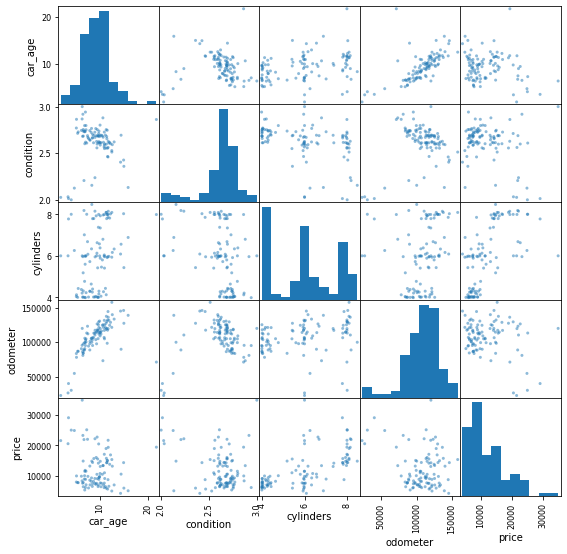

In [ ]:
vroom_corr = car_data.pivot_table(index='model', values=['price', 'car_age', 'odometer', 'cylinders', 'condition'])
pd.plotting.scatter_matrix(vroom_corr, figsize=(9, 9))
print(vroom_corr.corr())
#Correlación de los parámetros: precio, años del vehículo cuando se colocó el anuncio, millaje, número de cilindrada y condición.
#Vamos a trazar histogramas para cada uno de los parámetros.

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'car_age'}>],
       [<AxesSubplot:title={'center':'odometer'}>,
        <AxesSubplot:title={'center':'cylinders'}>],
       [<AxesSubplot:title={'center':'condition'}>, <AxesSubplot:>]],
      dtype=object)

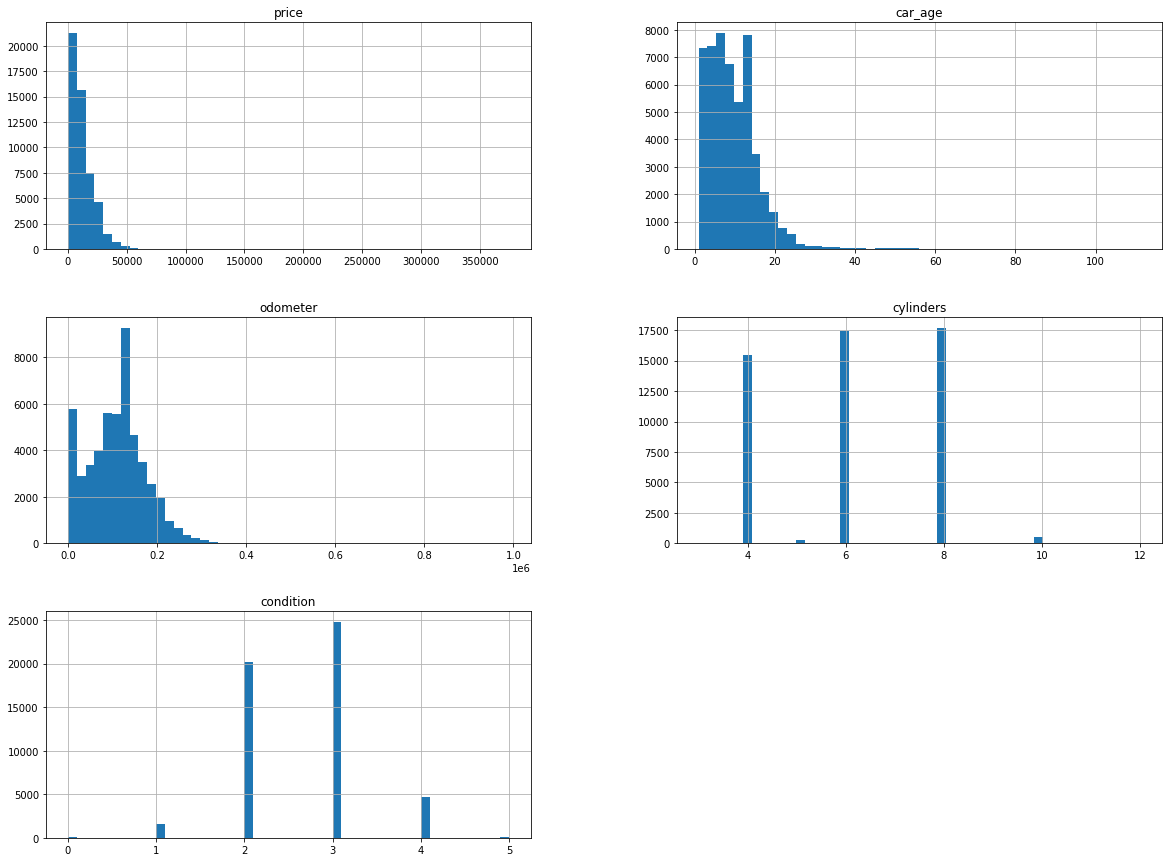

In [ ]:
car_data[['price', 'car_age', 'odometer', 'cylinders', 'condition']].hist(bins=50, figsize=(20, 15)) #Histograma para cada parámetro. Podemos asumir que hay algunos valores que están muy por fuera de la mayoría de los valores
#Estos ocasionan que los gráficos se vean así de dispersos

In [ ]:
car_data[['price', 'car_age', 'odometer', 'cylinders', 'condition']].describe() #aquí vamos a analizar estos valores atípicos con los cuartiles.

,price,car_age,odometer,cylinders,condition
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,9.434236,108917.463794,6.121494,2.637535
std,10040.803015,6.158345,66290.602376,1.657296,0.712447
min,1.000000,1.000000,0.000000,3.000000,0.000000
25%,5000.000000,5.000000,64110.000000,4.000000,2.000000
50%,9000.000000,8.000000,113333.000000,6.000000,3.000000
75%,16839.000000,13.000000,147821.000000,8.000000,3.000000
max,375000.000000,111.000000,990000.000000,12.000000,5.000000


<AxesSubplot:>

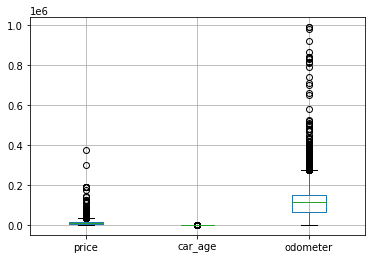

In [ ]:
to_filter = car_data[['price', 'car_age', 'odometer']]
to_filter.boxplot()

In [ ]:
to_filter.describe()

,price,car_age,odometer
count,51525.000000,51525.000000,51525.000000
mean,12132.464920,7.518777,108917.463794
std,10040.803015,6.054836,66290.602376
min,1.000000,0.000000,0.000000
25%,5000.000000,3.000000,64110.000000
50%,9000.000000,6.000000,113333.000000
75%,16839.000000,11.000000,147821.000000
max,375000.000000,109.000000,990000.000000


In [ ]:
iqr = car_data[['price', 'car_age', 'odometer']].quantile(0.75) - car_data[['price', 'car_age', 'odometer']].quantile(0.25)
out_upper = car_data[['price', 'car_age', 'odometer']].quantile(0.75) + iqr*1.5
out_lower = car_data[['price', 'car_age', 'odometer']].quantile(0.25) - iqr*1.5

In [ ]:
out_upper

price        34597.5
car_age         23.0
odometer    273387.5
dtype: float64

In [ ]:
out_lower

price      -12758.5
car_age        -9.0
odometer   -61456.5
dtype: float64

In [ ]:
car_filtered = car_data[(np.abs(stats.zscore(car_data[['price', 'car_age', 'odometer']])) < 3).all(axis=1)]
car_filtered = car_filtered.reset_index(drop=True, inplace=False)
car_filtered #97% de los datos del dataframe anterior.


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,week,month,year,car_age,avg_miles
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,surprise,1,2018-06-23,19,5,25,6,2018,6,24166.666667
1,25500,2013,ford f-150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,42,10,2018,4,22176.250000
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,6,2,2019,5,22000.000000
3,1500,2003,ford f-150,1,8,gas,200000,automatic,pickup,surprise,0,2019-03-22,9,4,12,3,2019,15,13333.333333
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,14,4,2019,1,80903.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50115,9249,2013,nissan maxima,4,6,gas,88136,automatic,sedan,black,0,2018-10-03,37,2,40,10,2018,4,22034.000000
50116,2700,2002,honda civic,0,4,gas,181500,automatic,sedan,white,0,2018-11-14,22,2,46,11,2018,15,12100.000000
50117,3950,2009,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32,3,46,11,2018,8,16000.000000
50118,7455,2013,toyota corolla,2,4,gas,139573,automatic,sedan,black,0,2018-07-02,71,0,27,7,2018,4,34893.250000


Text(0.5, 1.0, 'Precio de los vehículos')

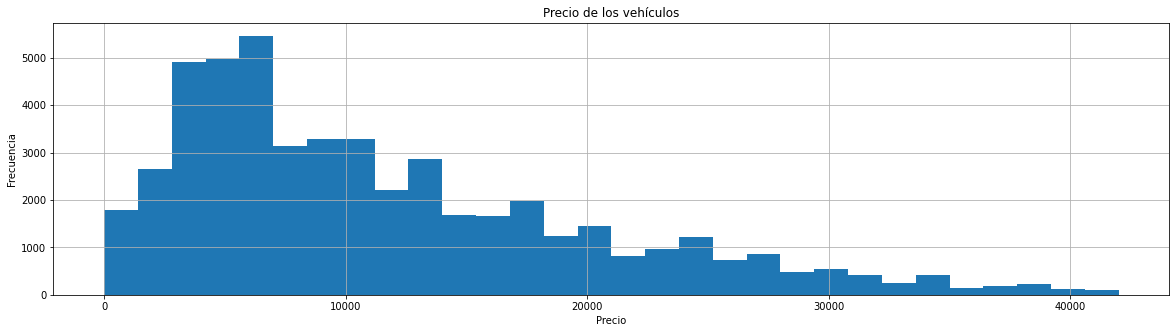

In [ ]:
car_filtered['price'].hist(bins=30, figsize=(20, 5))
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title("Precio de los vehículos") #mejor distribuidos en el histograma en comparación con los anteriores, ya no están tan cargadas a la izquierda.

Text(0.5, 1.0, 'Edades de los vehículos')

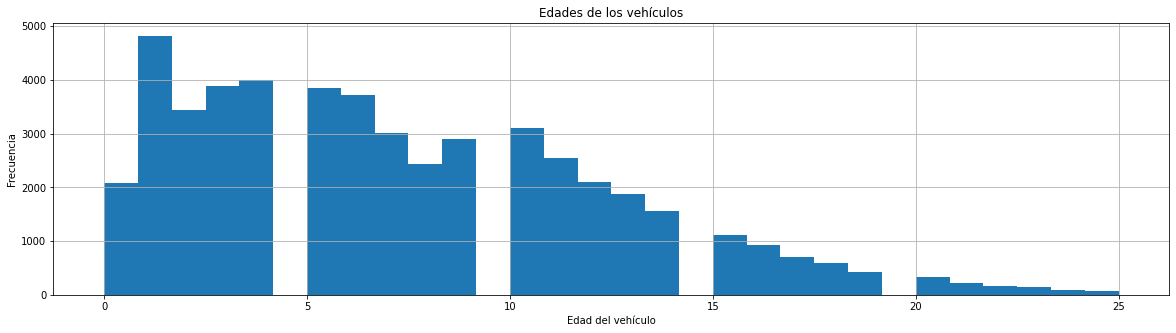

In [ ]:
car_filtered['car_age'].hist(bins=30, figsize=(20, 5))
plt.xlabel('Edad del vehículo')
plt.ylabel('Frecuencia')
plt.title("Edades de los vehículos")

Text(0.5, 1.0, 'Mijalle de vehículos')

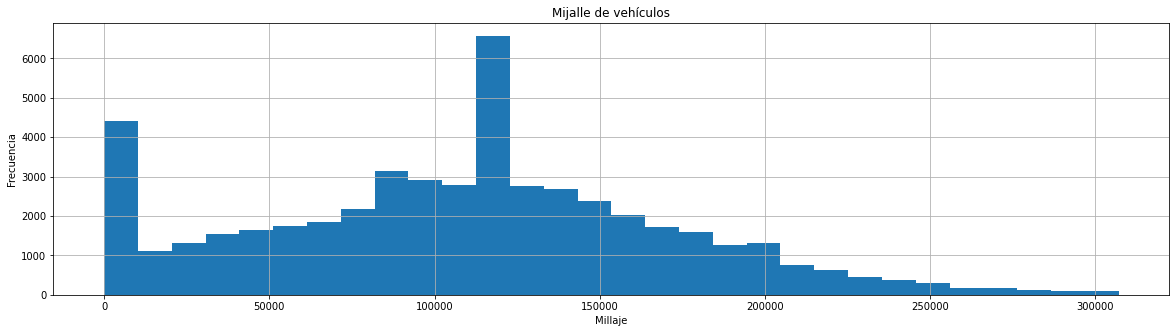

In [ ]:
car_filtered['odometer'].hist(bins=30, figsize=(20, 5))
plt.xlabel('Millaje')
plt.ylabel('Frecuencia')
plt.title("Mijalle de vehículos")

In [ ]:
car_filtered[['price', 'car_age', 'odometer', 'days_listed']].describe()

,price,car_age,odometer,days_listed
count,50120.000000,50120.000000,50120.000000,50120.000000
mean,11678.027554,7.240323,108491.886752,39.538268
std,8588.050410,5.154475,62596.354259,28.211569
min,1.000000,0.000000,0.000000,0.000000
25%,5000.000000,3.000000,65905.000000,19.000000
50%,8999.000000,6.000000,114000.000000,33.000000
75%,16300.000000,11.000000,147665.000000,53.000000
max,42000.000000,25.000000,307000.000000,271.000000


Tenemos el 97% de los datos del dataframe anterior vroom_data. Los valores máximos se redujeron en 800%, de 375,000	a 42,000 para el precio. La edad del vehículo se redujo de 110 a 27 años (25% aproximadamente). El millaje bajó de	990,000 a 294,000 (30%). Los gráficos presentan mejor distribución de los datos en el eje x, de acuerdo con los valores que tenemos en y que ya no estamos considerando (los outliers o valores atípicos que removimos del anterior dataframe vroom_data para las 3 columnas).

In [ ]:
car_filtered['days_listed'].describe() #media 39.5 y mediana 33.0 

count    50120.000000
mean        39.538268
std         28.211569
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

El tiempo que duraron los vehículos en el mercado en días, se encuentran una mayor frecuencia dentro del rango de **0-50** sólo observando el histograma. Si tomamos en cuenta los datos de media y mediana, podríamos decir que un auto pasa de **30 a 40** días en el mercado, lo cual quiere decir que: el tiempo de vida de un anuncio es igual que el tiempo que dura el vehículo en el mercado.

Text(0.5, 1.0, 'Distribución de los días en el mercado')

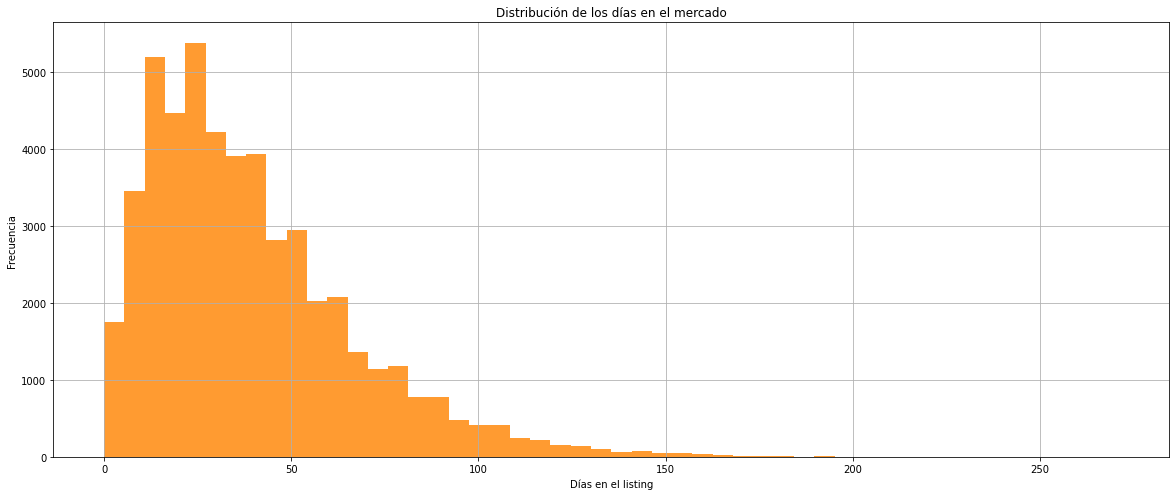

In [ ]:
car_filtered['days_listed'].hist(bins=50, figsize=(20, 8), color='#ff9b31') #La cantidad de días que pasaron los vehíuclos en el mercado. El 75% de los vehículos pasaron menos de 53 días disponibles.
plt.xlabel('Días en el listing')
plt.ylabel('Frecuencia')
plt.title("Distribución de los días en el mercado")

In [ ]:
car_filtered['type'].describe()

count     50120
unique       13
top         SUV
freq      12189
Name: type, dtype: object

In [ ]:
car_filtered['type'].unique() #Vamos a revisar la relación entre cada tipo de vehículo y el tiempo de vida del anuncio.

array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'hatchback',
       'wagon', 'mini-van', 'convertible', 'other', 'offroad', 'bus'],
      dtype=object)

<AxesSubplot:>

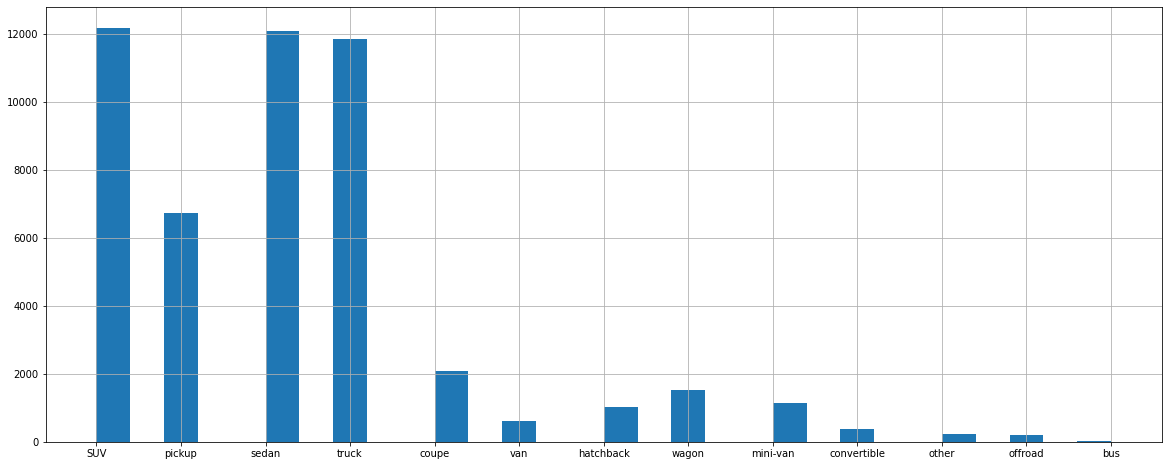

In [ ]:
car_filtered['type'].hist(bins=30, figsize=(20, 8))
# SUV, sedan y truck son los tipos de vehículo disponibles en el mercado que cuentan con mayor número de ejemplares en la muestra, los tres representan 72% de la muestra.

<AxesSubplot:ylabel='Frequency'>

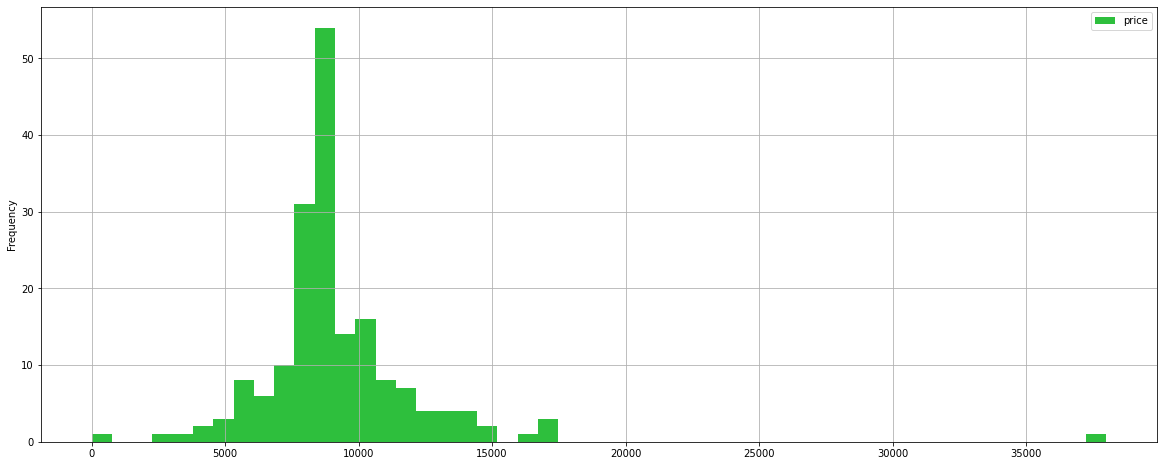

In [ ]:
car_filtered.query('type == "SUV"').pivot_table(index='days_listed', values='price', aggfunc='median').plot(kind='hist', grid=True, bins= 50, figsize=(20, 8), color='#2ebf3d')
# La 

In [ ]:
car_filtered[car_filtered['type'] == "SUV"].describe()['price']
# Se observa que los autos que pasaron menos días en el mercado fueron vendidos por precios bastante bajos, y otros vehículos que pasaron mayor tiempo en el mercado lograron ser vendidos a mayor precio.

count    12189.000000
mean     10752.376979
std       7717.003462
min          1.000000
25%       4995.000000
50%       8888.000000
75%      14900.000000
max      42000.000000
Name: price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

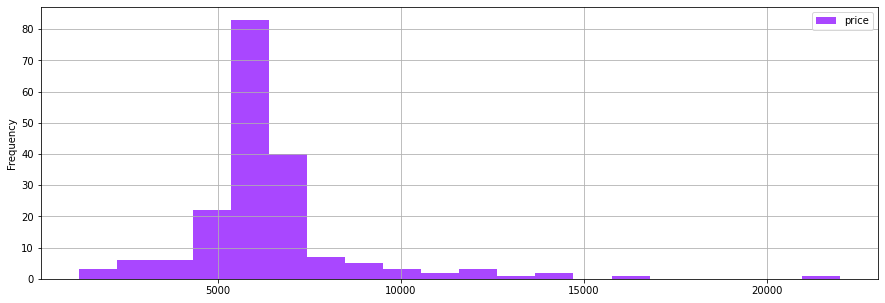

In [ ]:
car_filtered.query('type == "sedan"').pivot_table(index='days_listed', values=['price'], aggfunc='median').plot(kind='hist', grid=True, bins= 20, figsize=(15, 5), color='#a947ff')
# Los sedan de la muestra parece que fueron vendidos en su mayoría a precios más cerca de los 5,000

In [ ]:
car_filtered[car_filtered['type'] == "sedan"].describe()['price']

count    12098.000000
mean      6955.190941
std       4291.968081
min          1.000000
25%       3995.000000
50%       5995.000000
75%       9000.000000
max      40000.000000
Name: price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

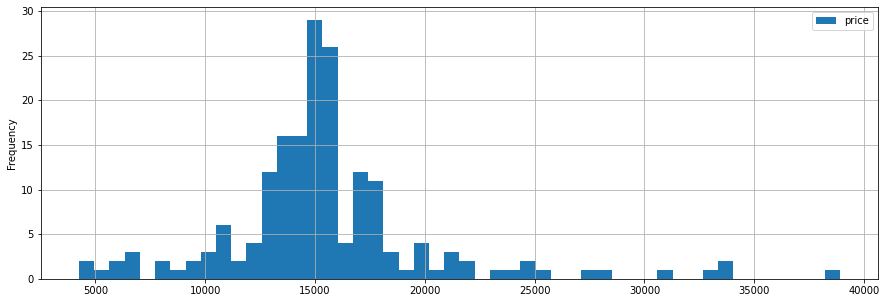

In [ ]:
car_filtered.query('type == "truck"').pivot_table(index='days_listed', values='price', aggfunc='median').plot(kind='hist', grid=True, bins= 50, figsize=(15, 5))

In [ ]:
car_filtered[car_filtered['type'] == "truck"].describe()['price'] # La media de los trucks fue la mayor de los 3 tipos de vehículos con una media de 16,000 dólares.
# El precio podría afectar la cantidad de días que pasa un vehículo anunciado en el mercado, cuando tienen precio menor se venden facilmente, mientras que cuando el precio es mas alto, el comprador se demora.
# Pero los días en el mercado no afectan el precio.

count    11860.000000
mean     15937.147555
std       9484.015761
min          1.000000
25%       8200.000000
50%      14990.000000
75%      22000.000000
max      42000.000000
Name: price, dtype: float64

In [ ]:
#Correlación negativa, son inversamente proporcionales, conforme X (edad) aumenta, Y (precio) disminuye. El precio del vehículo se ve afectado negativamente conforme la variable de la edad aumenta.  
car_filtered.query('type =="SUV"')['price'].corr(car_filtered['car_age'])


-0.570721152215499

In [ ]:
car_filtered.query('type =="SUV"')['price'].corr(car_filtered['odometer']) #El millaje también afecta el precio de la misma forma que la edad del vehículo.

-0.42027776230644087

In [ ]:
car_filtered.query('type =="SUV"')['price'].corr(car_filtered['condition'])  # La mejor condición tiene un 5 y la peor 0, aquí podemos ver que si la condición aumenta (mejor condición), también aumenta el precio.
# Por eso las variables son directamente proporcionales y si una aumenta la otra también, en proporción de la correlación.

0.2768201662470307

<AxesSubplot:xlabel='car_age', ylabel='price'>

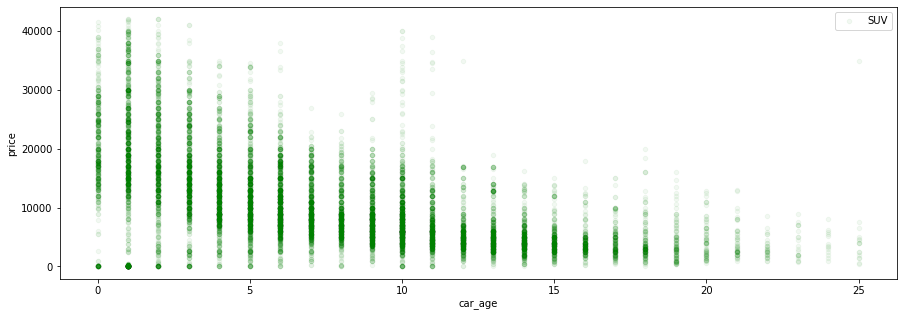

In [ ]:
car_suv = car_filtered.query('type == "SUV"')
car_suv.plot(x = 'car_age', y = 'price', kind='scatter',figsize=(15, 5),color='Green', label='SUV', alpha = 0.05)

<AxesSubplot:xlabel='odometer', ylabel='price'>

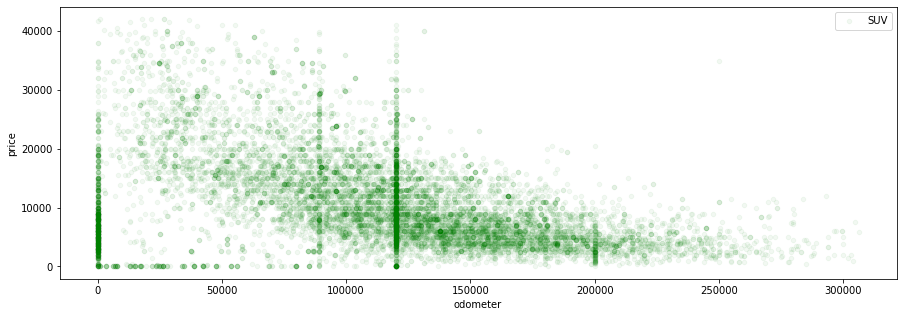

In [ ]:
car_suv = car_filtered.query('type == "SUV"')
car_suv.plot(x = 'odometer', y = 'price', kind='scatter',figsize=(15, 5),color='Green', label='SUV', alpha = 0.05)

<AxesSubplot:xlabel='condition', ylabel='price'>

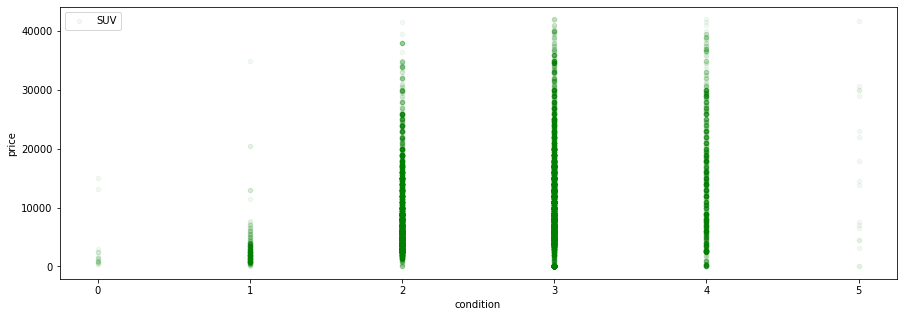

In [ ]:
car_suv = car_filtered.query('type == "SUV"')
car_suv.plot(x = 'condition', y = 'price', kind='scatter',figsize=(15, 5),color='Green', label='SUV', alpha = 0.05)

In [ ]:
car_filtered.query('type =="sedan"')['price'].corr(car_filtered['car_age']) #Podemos ver para el sedán, el comportamiento de las variables tiene un comprotamiento correlacional similar al de suv.
# Conforme aumenta la edad disminuye el precio.

-0.6007646661097605

In [ ]:
car_filtered.query('type =="sedan"')['price'].corr(car_filtered['odometer']) # Aumenta el millaje, aumenta el precio.

-0.4282160070520775

In [ ]:
car_filtered.query('type =="sedan"')['price'].corr(car_filtered['condition']) #mejora la condición del vehículo con la del precio.

0.29779230827889897

<AxesSubplot:xlabel='car_age', ylabel='price'>

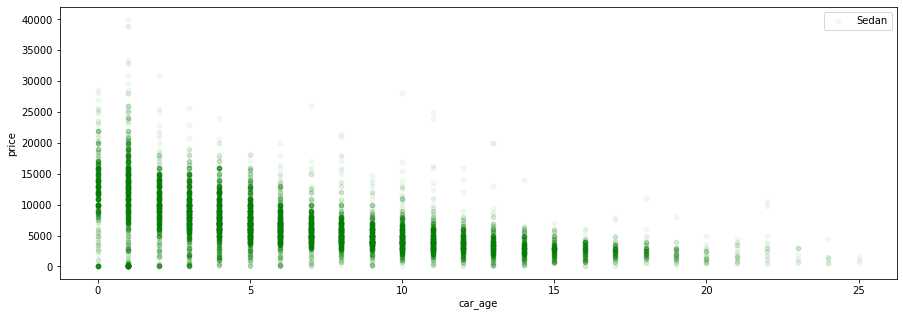

In [ ]:
car_sedan = car_filtered.query('type == "sedan"')
car_sedan.plot(x = 'car_age', y = 'price', kind='scatter',figsize=(15, 5),color='Green', label='Sedan', alpha = 0.05)

<AxesSubplot:xlabel='odometer', ylabel='price'>

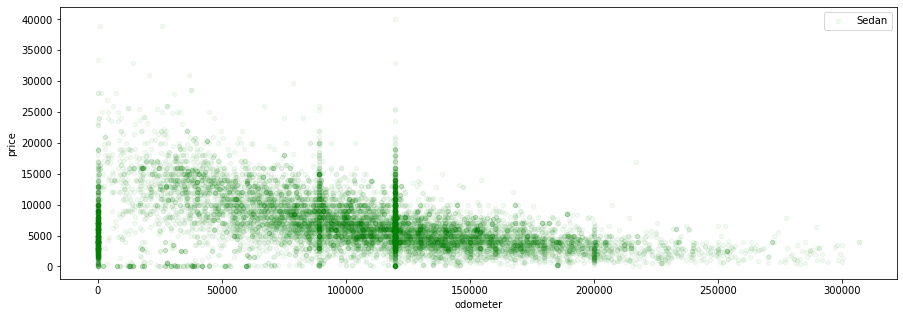

In [ ]:
car_sedan = car_filtered.query('type == "sedan"')
car_sedan.plot(x = 'odometer', y = 'price', kind='scatter',figsize=(15, 5),color='Green', label='Sedan', alpha = 0.05)

<AxesSubplot:xlabel='condition', ylabel='price'>

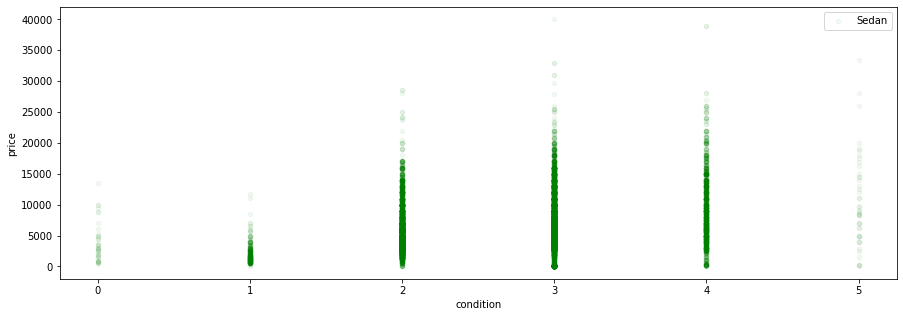

In [ ]:
car_sedan = car_filtered.query('type == "sedan"')
car_sedan.plot(x = 'condition', y = 'price', kind='scatter',figsize=(15, 5),color='Green', label='Sedan', alpha = 0.05)

<AxesSubplot:title={'center':'price'}, xlabel='paint_color'>

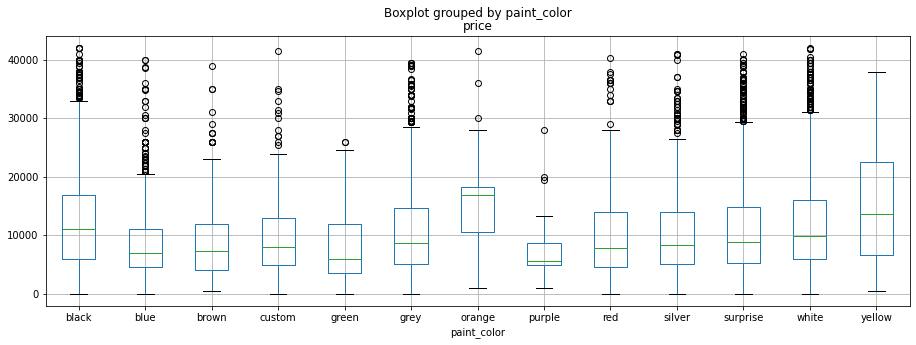

In [ ]:
car_suv.boxplot(by ='paint_color', column =['price'], grid = True, figsize=(15, 5)) # EL color más caro de suv fué el naranja.

<AxesSubplot:title={'center':'price'}, xlabel='paint_color'>

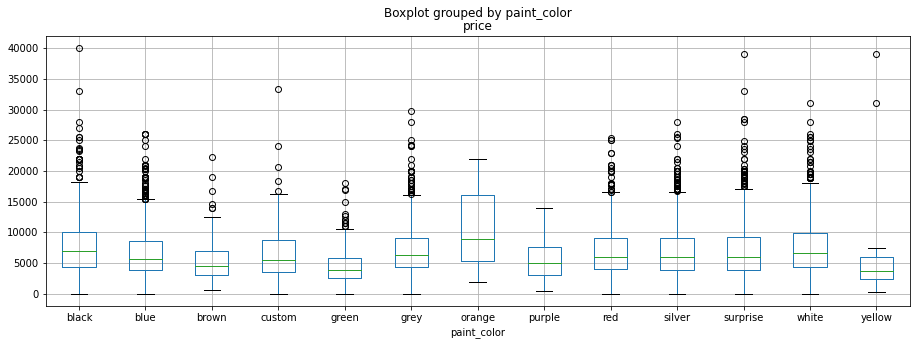

In [ ]:
car_sedan.boxplot(by ='paint_color', column =['price'], grid = True, figsize=(15, 5)) # el color de sedan más caro fué el naranja.

<AxesSubplot:title={'center':'price'}, xlabel='is_4wd'>

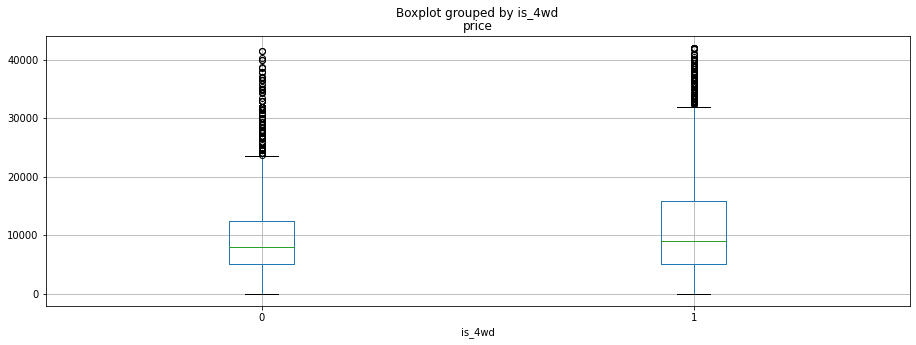

In [ ]:
car_suv.boxplot(by ='is_4wd', column =['price'], grid = True, figsize=(15, 5)) #Las mejores ventas se las llevaron los suv de tracción a 4 ruedas.

<AxesSubplot:title={'center':'price'}, xlabel='is_4wd'>

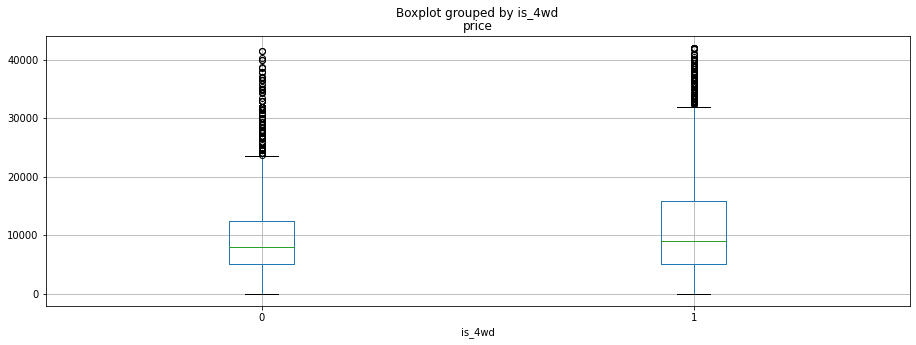

In [ ]:
car_suv.boxplot(by ='is_4wd', column =['price'], grid = True, figsize=(15, 5)) # También los sedan de tracción a 4 ruedas.

# **5.Conclusión**

1.   Se trataron los datos del dataframe para encontrar anomalías como valores ausentes o duplicados y valores atípicos en los datos.
2.   Filtramos la información para hacer los análisis de los datos más significativos en los que encontramos las dependencias de el dinero y el tiempo que el vehículo duró disponible en el mercado, a parti de los SUV y sedán.
3. Podemos concluir que el precio depende de la edad del vehículo y el millaje, así como los días en el mercado podrían verse afectados por el precio.
4. La condición del vehículo está directamente relacionada con el precio así que mejor condición, mejor precio.
5. Estuvo difícil.
